In [16]:
import os
from func import find_folders_with_pattern
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import simps
import matplotlib.ticker as ticker
from from_input_deck import extract_value_from_input_deck
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.constants import pi, e, hbar, m_e, c, epsilon_0

fontsize = 12
fontsize14 = 14

# in linux
# ########
#simulation_path = "/home/novac/Desktop/Projects/autorun_qv3d/temp/density-5.0e15"

# in windows
# ##########
simulation_path = os.path.join("C:\\", "Users", "u55266hs", "OneDrive - The University of Manchester", "coding", "SCARF")

In [17]:
density_scan_dir_paths = find_folders_with_pattern(simulation_path, 'density')

# Plot Critical energy vs plasma density

In [25]:
all_critical_energy = []
all_densities = []
for sim_dir in density_scan_dir_paths:

    # ######################
    # from input deck
    # ######################
    wavelength = extract_value_from_input_deck(sim_dir, 'Wavelength')
    wavelength *= 1e-2
    wp = 2*pi*c/wavelength
    kp = wp/c
    density = wp**2 * epsilon_0 * m_e / e**2
    all_densities.append(density/1e6) # append densities in cm
    #print("Plasm Density [/cm3]:", format(density/1e6, ".3e"))  # 3 decimal places

    # ######################
    # from synchrotron pkl files
    # ######################
    
    # Find all .pkl files
    # ####################
    pkl_files = glob.glob(f"{sim_dir}/*.pkl")


    # Load the pickle file
    # ####################
    pklFile = pkl_files[0]
   # print(pklFile)
    with open(pklFile, "rb") as file:
        data = pickle.load(file)

    # print the keys
    # ##############
    #for key in data.keys():
       # print(key)

    # Unpack dictionary keys into variables
    # #####################################
    if isinstance(data, dict):
        criticalEnergy = data.get("criticalEnergy")
        Nphotons_Energy = data.get("Nphoton_Energy")
        Nphoton_Theta  = data.get("Nphoton_Theta")
        Nphoton_Phi    = data.get("Nphoton_Phi")
        Energy         = data.get("Energy")
        Theta          = data.get("Theta")
        Phi            = data.get("Phi")
        phase          = data.get("phase")

    all_critical_energy.append(criticalEnergy)

In [26]:
all_critical_energy = np.array(all_critical_energy)
all_densities = np.array(all_densities)

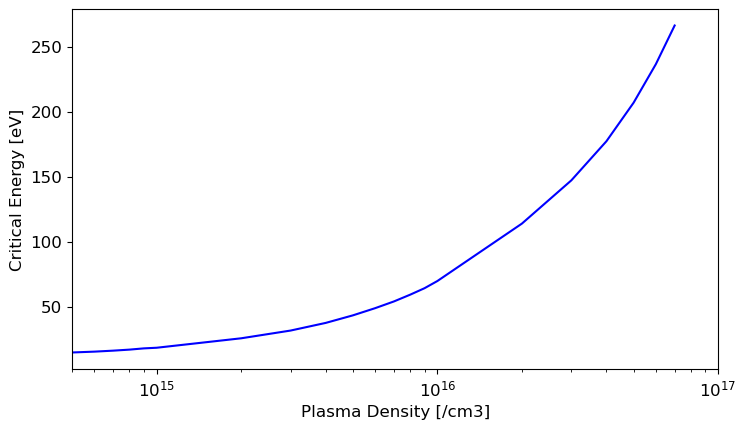

In [27]:
def plot_spectrum(Nphotons_Energy, Energy):
    fig,ax = plt.subplots(figsize=(8,5))
    fig.tight_layout(pad=4.) #set the spacing between subplots

    

    ax.plot(all_densities,all_critical_energy,c='b') # photon number ~ beta oscillations * number of electrons

    ax.set_xscale('log')

    ax.set_xlabel('Plasma Density [/cm3]', fontsize=fontsize)
    ax.set_ylabel('Critical Energy [eV]', fontsize=fontsize)
    ax.tick_params(axis='both',labelsize=fontsize)
    #ax.set_ylim(1,2e7)
    ax.set_xlim(5e14, 1e17)

    ax.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
    #ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
    locmin = ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=15)
    ax.xaxis.set_minor_locator(locmin)
    ax.xaxis.set_minor_formatter(ticker.NullFormatter())

    #ax.yaxis.set_minor_locator(locmin)
    #ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    plt.savefig("plasmaScan.pdf", dpi=100, bbox_inches='tight')
    plt.savefig("plasmaScan.png", dpi=100, bbox_inches='tight')

    

plot_spectrum(Nphotons_Energy, Energy)